In [78]:
import pandas as pd
import numpy as np

In [79]:
res = {}
architectures = ['cnn', 'MLP']
methods = ['magnitude', 'random']
scopes = ['global', 'local']
structures = ['structured', 'unstructured']
for architecture in architectures:
    for method in methods:
        for scope in scopes:
            for structure in structures:
                try:
                    res[f'{architecture}-{method}-{scope}-{structure}'] = pd.read_pickle(f'./final-results/fixed-eps-{architecture}-{method}-{scope}-{structure}.pkl')
                except:
                    pass
keys = list(res.keys())

In [80]:
keys

['cnn-magnitude-global-structured',
 'cnn-magnitude-global-unstructured',
 'cnn-magnitude-local-structured',
 'cnn-magnitude-local-unstructured',
 'cnn-random-local-structured',
 'cnn-random-local-unstructured',
 'MLP-magnitude-global-structured',
 'MLP-magnitude-global-unstructured',
 'MLP-magnitude-local-structured',
 'MLP-magnitude-local-unstructured',
 'MLP-random-local-structured',
 'MLP-random-local-unstructured']

In [81]:
def get_robust_lp_accuracy(col, eps = 10):
        success = []
        for i in range(len(col)):
            if (np.any([type(r)==str for r in col.tolist()])):
                success = success + [True for x in range(len(col.iloc[i][0]))]
            else:
                if type(col.iloc[i]) == float:
                    print(col.iloc[i])
                success = success + [c < eps for c in col.iloc[i][0]]
        return (1 - sum(success)/len(success))
def get_robust_l_inf_accuracy(col, eps = 8):
    epsilons = [2,4,8,16,32]
    idx = epsilons.index(eps)
    return 1 - np.sum([col.iloc[i][idx] for i in range(len(col))]) / len(col)
    

In [109]:

avg_res = {}
for key in (keys):
    print(key)
    avg_res[key]= pd.DataFrame()
    df = res[key]
    ratios = df['pruning_ratio'].unique()
    for ratio in ratios:
        frac_ratio = 1/(1-ratio)
        a = df.loc[df['pruning_ratio'] == ratio]
        temp_df = pd.DataFrame({
            "mean_accuracy": a['accuracy'].mean(), 
            "mean_l0_acc": get_robust_lp_accuracy(a['bb_l0'], eps = 12),
            "mean_l2_acc" : get_robust_lp_accuracy(a['cw_l2'], eps = 2.5),
            "mean_l_inf_acc" : get_robust_l_inf_accuracy(a['pgd_linf'], eps=16) #x/255
        },
        index=[frac_ratio]
        )
        avg_res[key] = avg_res[key].append(temp_df)
        
    

cnn-magnitude-global-structured
cnn-magnitude-global-unstructured
cnn-magnitude-local-structured
cnn-magnitude-local-unstructured
cnn-random-local-structured
cnn-random-local-unstructured
MLP-magnitude-global-structured
MLP-magnitude-global-unstructured
MLP-magnitude-local-structured
MLP-magnitude-local-unstructured
MLP-random-local-structured
MLP-random-local-unstructured


In [74]:
avg_res['cnn-magnitude-global-unstructured']

,mean_accuracy,mean_l0_acc,mean_l2_acc,mean_l_inf_acc
1.0,0.98622,0.6726,0.8986,0.7988
2.0,0.98745,0.7042,0.9108,0.7965
4.0,0.98853,0.6705,0.8988,0.7739
8.0,0.98865,0.6224,0.8732,0.7445
16.0,0.98759,0.5452,0.8196,0.7007
32.0,0.98462,0.4990,0.7576,0.6394
64.0,0.97673,0.4352,0.6062,0.5309


In [110]:
keys = list(avg_res.keys())
keys

['cnn-magnitude-global-structured',
 'cnn-magnitude-global-unstructured',
 'cnn-magnitude-local-structured',
 'cnn-magnitude-local-unstructured',
 'cnn-random-local-structured',
 'cnn-random-local-unstructured',
 'MLP-magnitude-global-structured',
 'MLP-magnitude-global-unstructured',
 'MLP-magnitude-local-structured',
 'MLP-magnitude-local-unstructured',
 'MLP-random-local-structured',
 'MLP-random-local-unstructured']

In [126]:
keys = list(avg_res.keys())[:6]
l0_accs = [avg_res[key]['mean_l_inf_acc'] for key in keys]
l0_accs_1 = []
for key in keys:
    col = avg_res[key]['mean_l_inf_acc']
    col = col.rename(key)
    l0_accs_1.append(col)

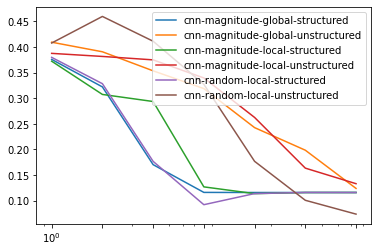

In [127]:
 
x = pd.concat(l0_accs_1, axis=1, sort=False).plot()
x.set_xscale('log')
x.set_xticks([1,2,4,8,16,32,64])

In [130]:
keys = list(avg_res.keys())[6:]
l0_accs = [avg_res[key]['mean_l_inf_acc'] for key in keys]
l0_accs_1 = []
for key in keys:
    col = avg_res[key]['mean_l_inf_acc']
    col = col.rename(key)
    l0_accs_1.append(col)

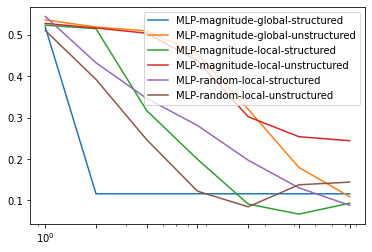

In [131]:
 
x = pd.concat(l0_accs_1, axis=1, sort=False).plot()
x.set_xscale('log')
x.set_xticks([1,2,4,8,16,32,64])

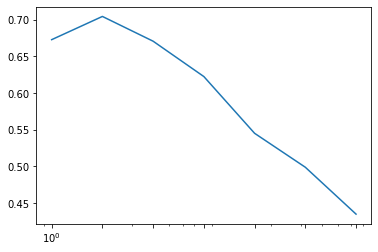

In [41]:
x= avg_res['cnn-magnitude-global-unstructured']['mean_l0_acc'].plot()
x.set_xscale('log')
x.set_xticks([1,2,4,8,16,32,64])


In [18]:
for key in keys:
    res[key]

,iteration,experiment_name,structure,method,scope,pruning_ratio,accuracy,loss,pgd_linf,cw_l2,bb_l0,total_params,params_left
0,0,fixed-eps-cnn-magnitude-global-structured,structured,magnitude,global,0,0.9853,1.4757,"[0.021, 0.054, 0.211, 0.64, 0.947]","([2.316172, 3.162531, 2.5032544, 2.7524843, 1....","([3, 13, 23, 8, 2, 60, 6, 13, 18, 202, 19, 5, ...",61470,61470
0,0,fixed-eps-cnn-magnitude-global-structured,structured,magnitude,global,0.5,0.9851,1.47599,"[0.016, 0.049, 0.262, 0.672, 0.957]","([1.208936, 4.10531, 2.184649, 1.8084494, 2.13...","([3, 18, 8, 6, 3, 55, 4, 26, 8, 105, 27, 13, 1...",61470,24891
0,0,fixed-eps-cnn-magnitude-global-structured,structured,magnitude,global,0.75,0.9629,1.498,"[0.072, 0.193, 0.484, 0.86, 0.991]","([0.7687318, 2.6086702, 2.435554, 0.7627147, 1...","([1, 5, 4, 1, 3, 13, 4, 26, 4, 6, 239, 6, 7, 1...",61470,7802
0,0,fixed-eps-cnn-magnitude-global-structured,structured,magnitude,global,0.875,0.1135,2.30116,"[0.884, 0.884, 0.884, 0.884, 0.884]","([1.3534614e-05, 1.3560162e-05, 1.35806085e-05...",not successful,61470,1085
0,0,fixed-eps-cnn-magnitude-global-structured,structured,magnitude,global,0.9375,0.1135,2.30124,"[0.884, 0.884, 0.884, 0.884, 0.884]","([1.3534614e-05, 1.3560162e-05, 1.35806085e-05...",not successful,61470,555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,9,fixed-eps-cnn-magnitude-global-structured,structured,magnitude,global,0.75,0.9768,1.48446,"[0.04, 0.138, 0.471, 0.804, 0.959]","([0.7544646, 3.6182826, 1.7919617, 1.0644914, ...","([2, 270, 16, 5, 5, 199, 5, 8, 6, 13, 45, 3, 1...",61470,7838
0,9,fixed-eps-cnn-magnitude-global-structured,structured,magnitude,global,0.875,0.1135,2.30111,"[0.884, 0.884, 0.884, 0.884, 0.884]","([1.3534614e-05, 1.3560162e-05, 1.35806085e-05...",not successful,61470,1085
0,9,fixed-eps-cnn-magnitude-global-structured,structured,magnitude,global,0.9375,0.1135,2.30104,"[0.884, 0.884, 0.884, 0.884, 0.884]","([1.3534614e-05, 1.3560162e-05, 1.35806085e-05...",not successful,61470,555
0,9,fixed-eps-cnn-magnitude-global-structured,structured,magnitude,global,0.96875,0.1135,2.30105,"[0.884, 0.884, 0.884, 0.884, 0.884]","([1.3534614e-05, 1.3560162e-05, 1.35806085e-05...",not successful,61470,290


In [3]:
for b in [1,2,4,8,16,32,64]:
    a = res.loc[res['pruning_ratio'] == 1-1/b]
    mean_accuracy = a['accuracy'].mean()
    def get_robust_accuracy(col):
        l2_eps = 10
        success = []
        for i in range(len(col)):
            if (np.any([type(r)==str for r in col.tolist()])):
                success = success + [True for x in range(len(col.iloc[i][0]))]
            else:
                success = success + [c < l2_eps for c in col.iloc[i][0]]
        return (1 - sum(success)/len(success))
    #print(get_robust_accuracy(a['cw_l2']))
    print(get_robust_accuracy(a['bb_l0']))

0.5542
0.5396000000000001
0.3792
0.0
0.0
0.0
0.0


In [7]:
a['bb_l0']

0    ([2, 33, 9, 7, 7, 19, 6, 26, 6, 11, 217, 12, 3...
0    ([1, 12, 210, 7, 121, 221, 6, 135, 2, 9, 196, ...
0    ([3, 230, 5, 7, 4, 8, 4, 159, 5, 16, 33, 4, 25...
0    ([4, 103, 4, 8, 4, 198, 15, 79, 7, 19, 93, 6, ...
0    ([2, 113, 3, 10, 129, 6, 9, 20, 6, 8, 21, 160,...
0    ([4, 3, 4, 5, 2, 9, 7, 32, 9, 15, 12, 13, 14, ...
0    ([228, 201, 11, 8, 131, 5, 76, 228, 11, 85, 9,...
0    ([4, 21, 3, 6, 5, 9, 6, 20, 5, 20, 8, 6, 199, ...
0    ([6, 54, 6, 3, 6, 19, 8, 17, 6, 15, 157, 8, 42...
0    ([31, 13, 4, 5, 6, 34, 10, 28, 4, 13, 21, 10, ...
Name: bb_l0, dtype: object

In [38]:
cw_res

[0.25585526,
 10.188791,
 7.6986027,
 7.6423044,
 8.789683,
 9.823318,
 7.848547,
 11.087442,
 5.974718,
 8.435023,
 9.914962,
 6.7549243,
 11.000008,
 9.634161,
 6.2104006,
 9.209476,
 8.951419,
 9.413115,
 6.3541794,
 7.5657988,
 10.858097,
 10.9633,
 1.2632612,
 7.479984,
 0.5705621,
 11.843547,
 6.452339,
 12.772426,
 12.093888,
 0.5684579,
 0.5657794,
 10.593088,
 7.343523,
 8.329098,
 11.296848,
 7.1649604,
 10.577955,
 11.3405075,
 8.460531,
 9.484159,
 6.767211,
 9.686393,
 6.261355,
 7.6184945,
 2.812579,
 8.930007,
 8.4672,
 8.833543,
 0.5852691,
 10.577392,
 7.6610117,
 12.623623,
 3.9154463,
 1.0974426,
 0.88611156,
 10.428776,
 1.2455131,
 8.051316,
 10.991113,
 7.571774,
 0.38152987,
 7.5532546,
 10.185857,
 12.715674,
 9.302235,
 7.3479056,
 9.706925,
 0.16736741,
 9.016094,
 12.219416,
 0.12002195,
 8.136846,
 5.8750544,
 9.173907,
 9.392174,
 10.820979,
 9.200603,
 7.6324015,
 1.3282444,
 8.869289,
 1.3517227e-05,
 11.296276,
 11.864445,
 9.50911,
 7.7932396,
 9.197659

In [77]:
cols = ['iteration','experiment_name','structure','method','scope','pruning_ratio','accuracy','loss','pgd_linf','cw_l2','bb_l0', 'total_params', 'params_left']
results = pd.DataFrame(columns=cols, dtype='object')

In [78]:
results

,iteration,experiment_name,structure,method,scope,pruning_ratio,accuracy,loss,pgd_linf,cw_l2,bb_l0,total_params,params_left


In [97]:
add = {
    'iteration':1,
    'experiment_name':'name',
    'structure':1,
    'method':[1,2],
    'scope':1,
    'pruning_ratio':.17,
    'accuracy':.97,
    'loss':1.45,
    'pgd_linf':.98,
    'cw_l2':.66,
    'bb_l0':.44,
    'total_params':222223,
    'params_left':4234234
}

In [98]:
new = pd.DataFrame([add], index=[0], dtype='object')

new

,iteration,experiment_name,structure,method,scope,pruning_ratio,accuracy,loss,pgd_linf,cw_l2,bb_l0,total_params,params_left
0,1,name,1,"[1, 2]",1,0.17,0.97,1.45,0.98,0.66,0.44,222223,4234234


In [99]:
results.append(pd.DataFrame(new))

,iteration,experiment_name,structure,method,scope,pruning_ratio,accuracy,loss,pgd_linf,cw_l2,bb_l0,total_params,params_left
0,1,name,1,"[1, 2]",1,0.17,0.97,1.45,0.98,0.66,0.44,222223,4234234


In [134]:
test = pd.read_csv('cnn-fixed-eps.csv', dtype='object')

In [135]:
test

,iteration,experiment_name,structure,method,scope,pruning_ratio,accuracy,loss,pgd_linf,cw_l2,bb_l0,total_params,params_left
0,0,cnn-random-local-unstructured,unstructured,random,local,0.0,0.9839000105857849,1.477670669555664,1.809,"([<tf.Tensor: shape=(), dtype=float32, numpy=0...","([5, 17, 6, 9, 3, 8, 12, 41, 9, 20, 45, 5, 33,...",61470,61470
1,1,cnn-random-local-unstructured,unstructured,random,local,0.5,0.9857000112533569,1.476232647895813,1.612,"([<tf.Tensor: shape=(), dtype=float32, numpy=0...","([3, 22, 7, 8, 5, 12, 15, 29, 12, 8, 11, 9, 35...",61470,30786


In [136]:
>>> from ast import literal_eval
yo = test['bb_l0'][0]

([5,
  17,
  6,
  9,
  3,
  8,
  12,
  41,
  9,
  20,
  45,
  5,
  33,
  11,
  5,
  7,
  15,
  5,
  2,
  3,
  26,
  46,
  8,
  5,
  5,
  3,
  4,
  38,
  29,
  3,
  14,
  7,
  14,
  3,
  7,
  10,
  11,
  12,
  5,
  7,
  4,
  7,
  4,
  8,
  9,
  7,
  14,
  22,
  3,
  19,
  10,
  20,
  7,
  5,
  2,
  6,
  15,
  5,
  6,
  6,
  6,
  8,
  3,
  5,
  23,
  6,
  5,
  1,
  11,
  8,
  4,
  13,
  6,
  9,
  14,
  7,
  25,
  7,
  2,
  7,
  0,
  9,
  14,
  5,
  10,
  7,
  26,
  15,
  35,
  11,
  25,
  24,
  5,
  8,
  4,
  18,
  10,
  5,
  10,
  3,
  6,
  8,
  16,
  11,
  10,
  17,
  2,
  36,
  10,
  2,
  9,
  303,
  8,
  9,
  10,
  9,
  29,
  2,
  10,
  16,
  4,
  10,
  23,
  15,
  3,
  2,
  3,
  8,
  7,
  6,
  30,
  10,
  0,
  5,
  4,
  37,
  18,
  3,
  4,
  11,
  5,
  9,
  9,
  3,
  4,
  15,
  3,
  12,
  1,
  20,
  12,
  7,
  4,
  7,
  14,
  10,
  13,
  21,
  2,
  7,
  5,
  8,
  8,
  13,
  11,
  7,
  9,
  21,
  5,
  7,
  15,
  10,
  0,
  8,
  3,
  21,
  19,
  5,
  2,
  164,
  2,
  27,
  10,
  9,
  